# Applying Machine Learning Techniques to Credit Card Fraud Detecion
#### Nam Nguyen
<p>Credit card plays a essential role in digitalization of our society. Starting in the 1980s, there has been an impressive increase in the use of credit, debit and pre-paid cards internationally. According to Shift Processing (2020), there are 1.06 billion credit cards in use in America, and 2.8 billion credit cards in worldwide. However, this trend of using is a goldmine for cybercriminals. Credit card fraud is likely a growing concern for not only the merchants and card issuers but also the individual clients.  In 2018, the loss by payment card fraud reached 27.85 billion dollar worldwide, an increase of 16.2 % from 23.97 billion dollar in 2017, and is expected to increase to 35.67 billion dollar in next five years (Nilson Report, 2019). Many actions have been taken by credit card providers to response this alarming issue. In these measures , predictive model based on Machine Learning promises to be an effective solution. However, designing a fraud detection system based on Machine Learning is challenging task. One of the major concerns is the highly imbalanced class distribution of the input data due to the fact that only a very small percentage of all transactions is fraudulent.</p>
<p>In this notebook, we are going to deal with imbalanced classification problem in credit card fraud detection through working with a real data set.</p>
<p><img src='creditcard1.jpg' alt='Credit card'></p>
<p>We'll use <a href='https://www.kaggle.com/mlg-ulb/creditcardfraud'>Credit card fraud data set</a> in this notebook. This data set has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group of Universit Libre de Bruxelles (ULB) and Worldline on big data mining and fraud detection. It was also made available for public on Kaggle.</p>
<p>In detail, our data set presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score, \
precision_score, recall_score, roc_auc_score, f1_score, precision_recall_curve, auc 

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set(style='darkgrid',palette='Set2')

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<p>Our data set has 30 input features in which 28 features have been generated by <strong>Principal Component Analysis (PCA)</strong>. Two features that have not been transfromed are <strong>Time</strong>, which refers the time between each transaction and the first transaction, and <strong>Amount</strong>, which tell us the amount of each transaction. The target variable is Class which receive <strong>1</strong> if transaction is fraudulent and <strong>0</strong> if transaction is genuine</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<p>There are no null values in our data set. So, we do not need the step to replace null values. Now we check the feature class to see how imbalaced our data set is.</p>
<p>As all of V features are transformed using PCA, neither features make much sense and nor will the descriptive statistics. Therefore, there are no descriptive statistics for these features. Only <code>Time</code> and Amount should be examined.</p>

In [5]:
df[['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


<p>Now we are going to take a look on the distribution of features <code>Amount</code> and <code>Time</code></p>

(0.0, 172792.0)

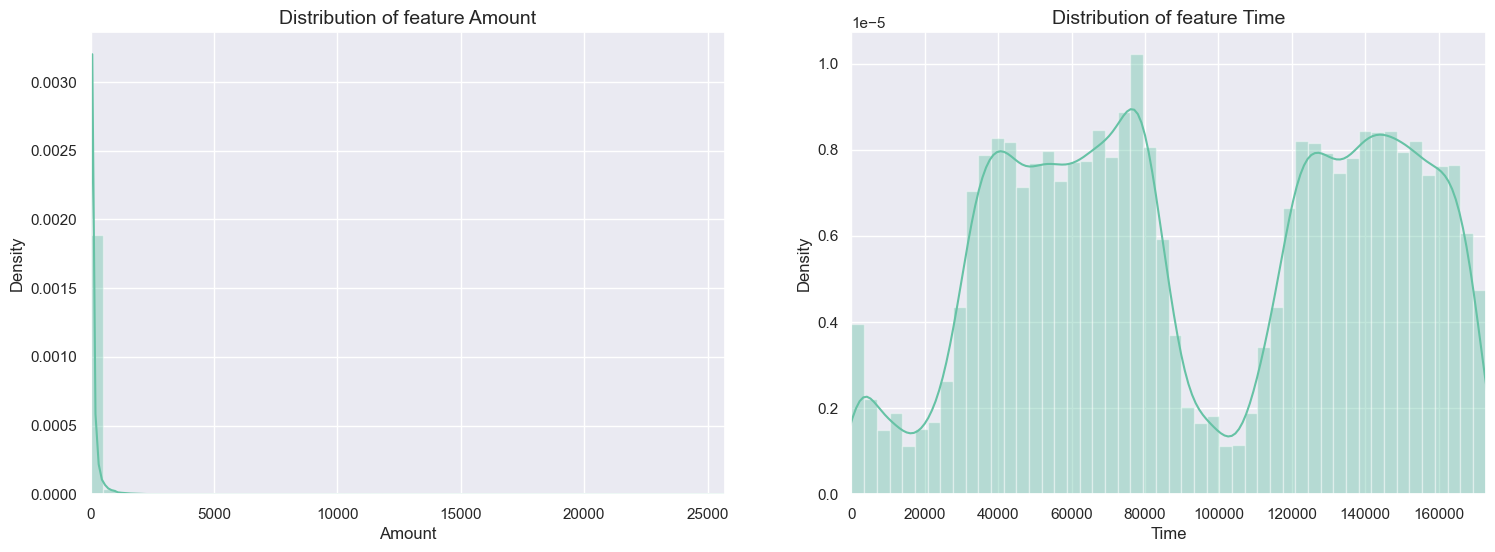

In [6]:
# Visualize the distribution of feature Amount a Time
fig, axes = plt.subplots(ncols=2, figsize=(18,6))
sns.distplot(df['Amount'], ax=axes[0])
axes[0].set_title('Distribution of feature Amount', fontsize=14)
axes[0].set_xlim([min(df['Amount']), max(df['Amount'])])

sns.distplot(df['Time'], ax=axes[1])
axes[1].set_title('Distribution of feature Time', fontsize=14)
axes[1].set_xlim([min(df['Time']), max(df['Time'])])

### Data reduction
<p>Mean of amount is around 88 and the standard deviation is about 250 while the median is 22. That means there are outliers in this feature.</p>

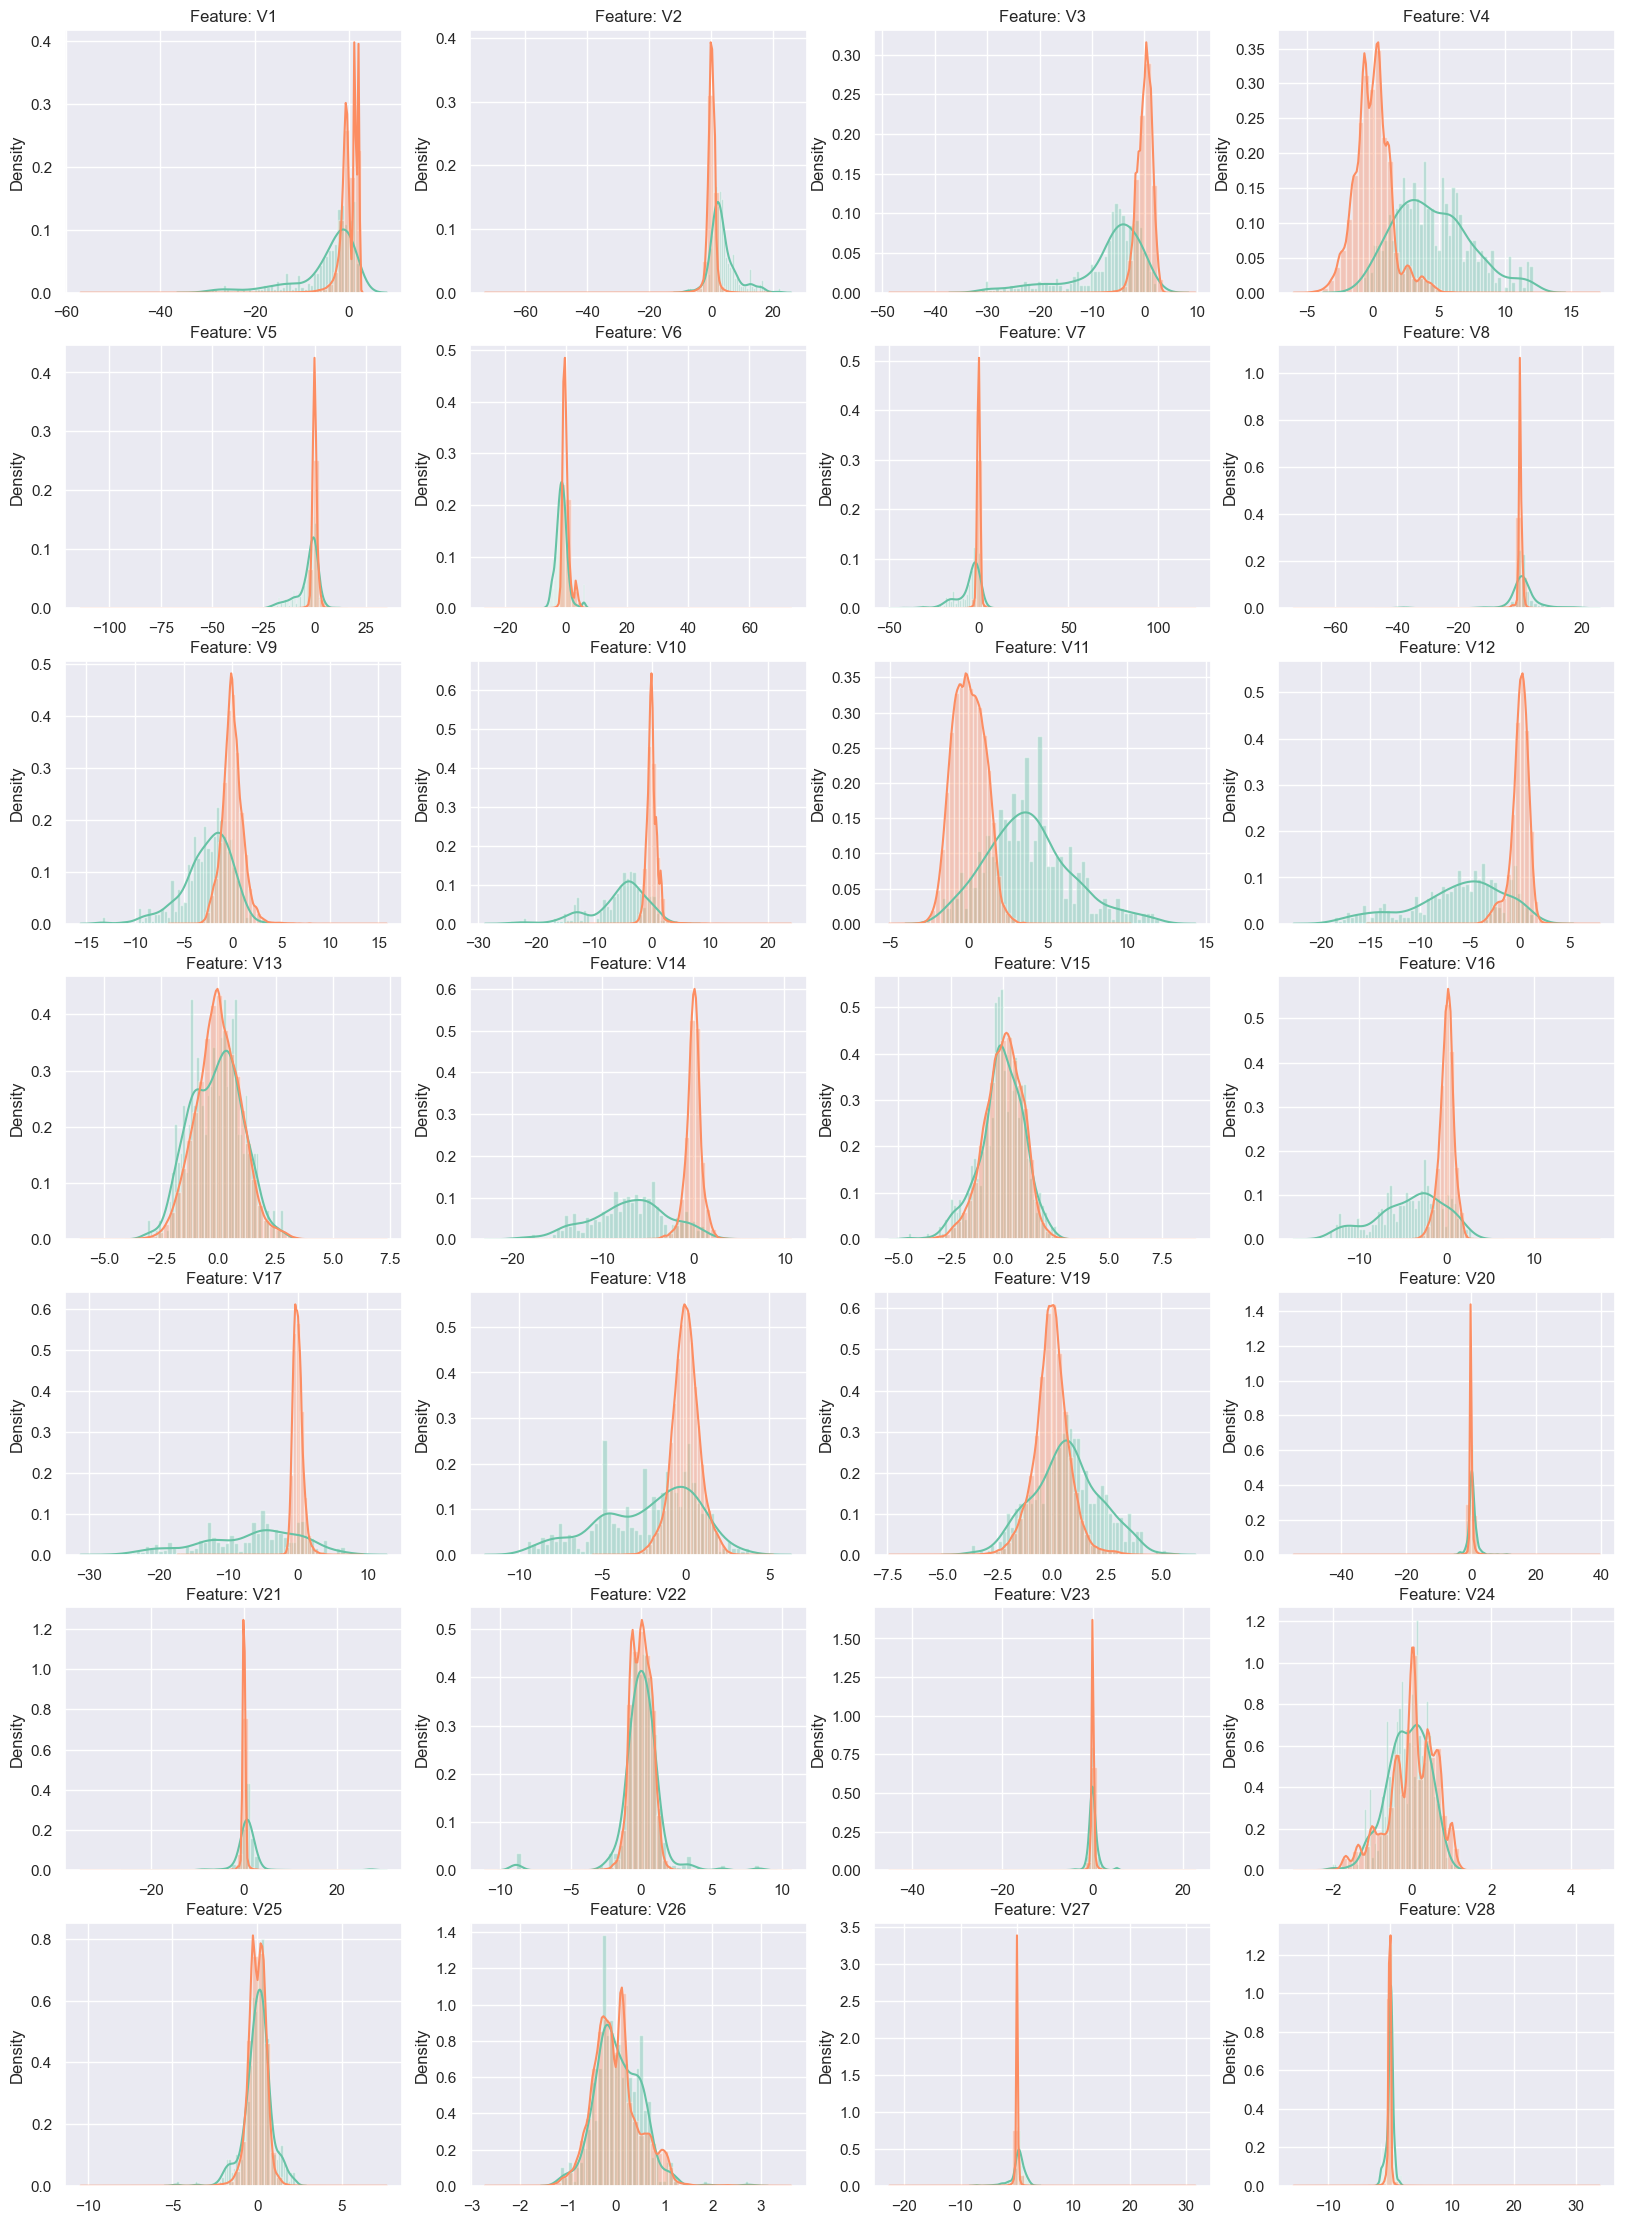

In [7]:
#Select only the anonymized features.
v_features = df.iloc[:,1:29].columns
plt.figure(figsize=(20,7*4))
gs = gridspec.GridSpec(7, 4)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(cn))
plt.show()

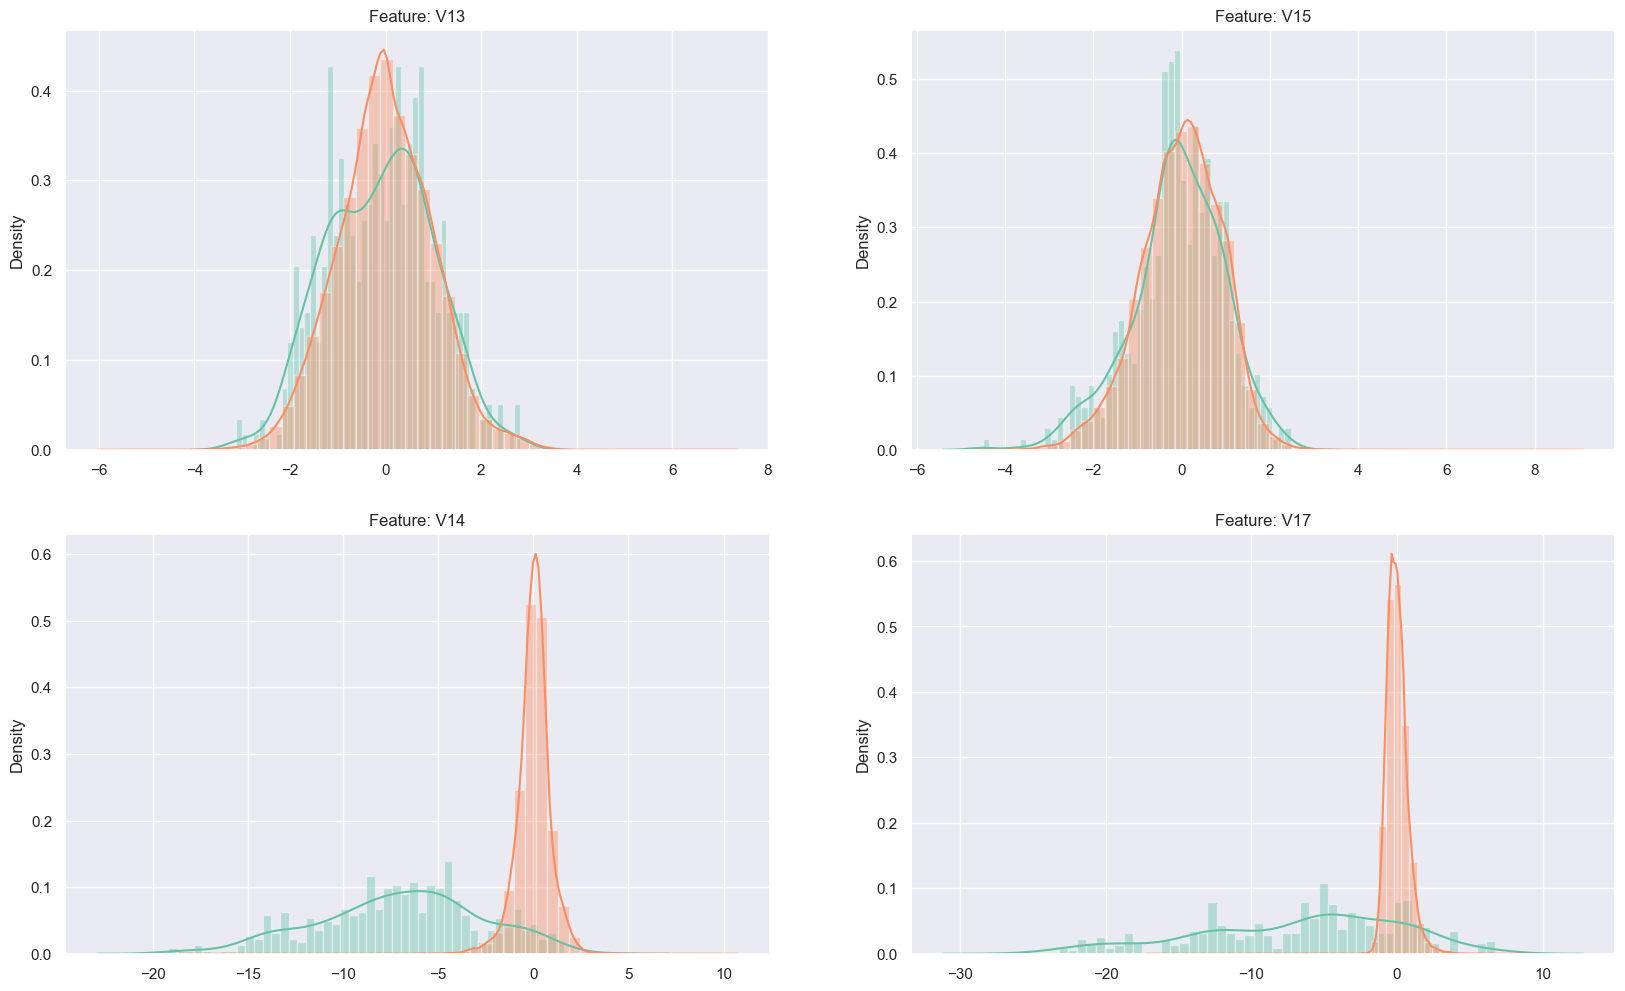

In [8]:
v_features_ = df[['V13','V15', 'V14', 'V17']].columns
plt.figure(figsize=(20,6*2))
gs = gridspec.GridSpec(2, 2)
for i, cn in enumerate(df[v_features_]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(cn))
plt.show()

Text(0, 0.5, 'Correlations with target variable')

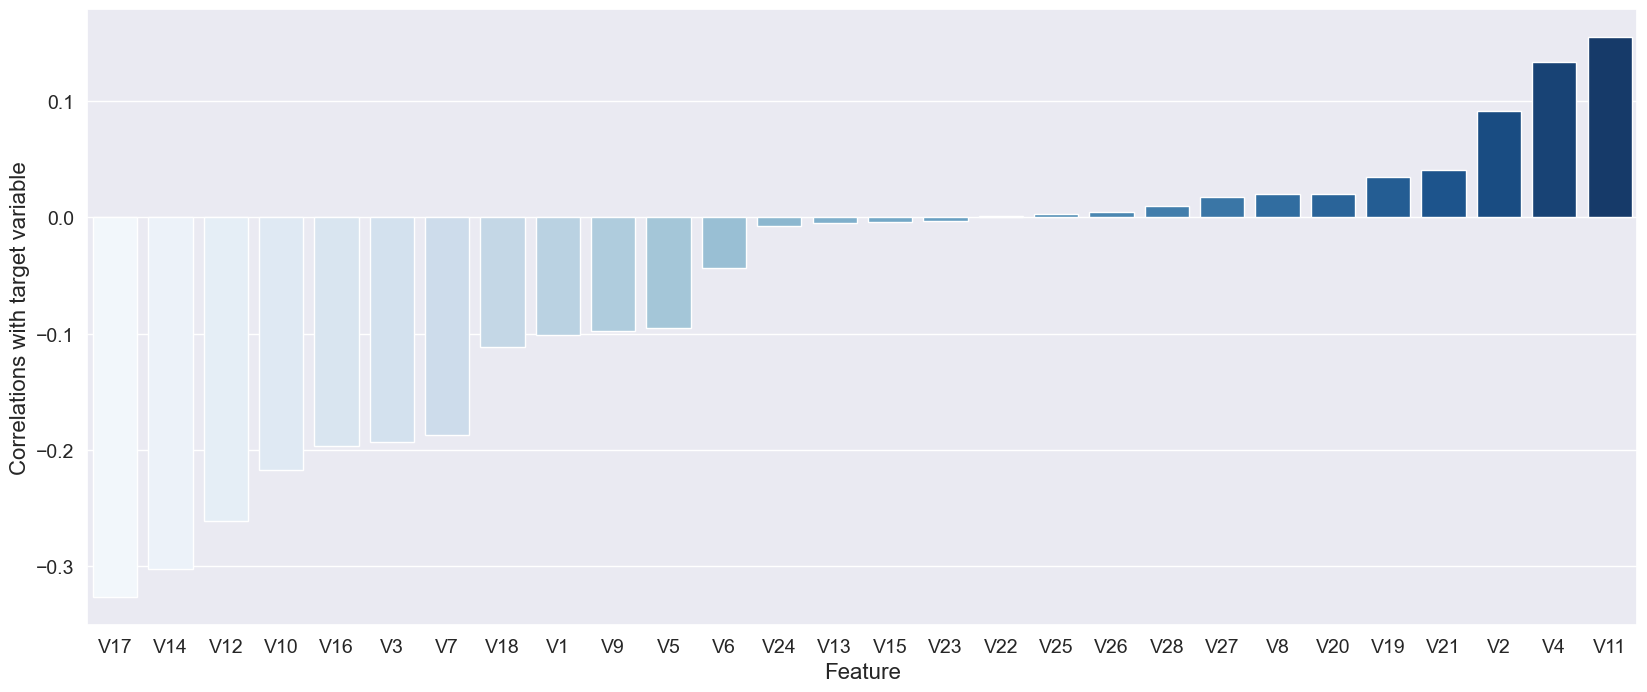

In [9]:
corr = df.corrwith(df['Class']).reset_index()
corr.columns = ['Feature','Correlations']
corr = corr.set_index('Feature')
corr.drop(['Class', 'Time', 'Amount'], axis=0, inplace = True)
corr = corr.sort_values(by=['Correlations'], ascending = True)
plt.figure(figsize=(20,8))
sns.barplot(x=corr.index, y=corr['Correlations'], palette="Blues")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature',fontsize=16)
plt.ylabel('Correlations with target variable',fontsize=16)

In [10]:
corr['Correlations']=corr['Correlations'].abs()
corr = corr.sort_values(by=['Correlations'], ascending = True)
corr.head(10)

,Correlations
Feature,
V22,0.000805
V23,0.002685
V25,0.003308
V15,0.004223
V26,0.004455
V13,0.004570
V24,0.007221
V28,0.009536
V27,0.017580


<p>Drop all of the features that have very similar distributions between the two types of transactions.</p>

In [11]:
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

In [12]:
df.shape

(284807, 20)

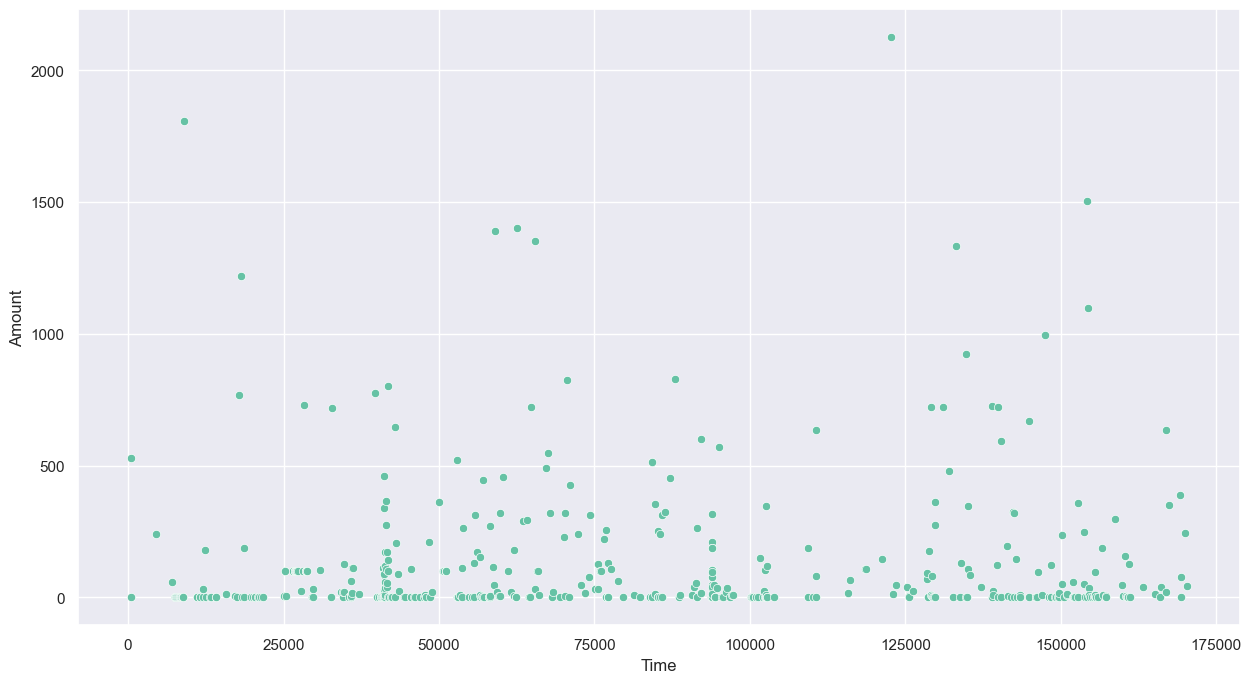

In [13]:
df_fraud = df[df['Class']==1]
plt.figure(figsize=(15,8))
sns.scatterplot(x=df_fraud['Time'], y=df_fraud['Amount'], data=df_fraud)
plt.show()

<p>The Time does not impact the frequency of fraud.</p>

In [14]:
print('Genuine', round(df['Class'].value_counts()[0]/len(df)*100,2),'% of the dataset')
print('Fraud',round(df['Class'].value_counts()[1]/len(df)*100,2),'% of the dataset')

Genuine 99.83 % of the dataset
Fraud 0.17 % of the dataset


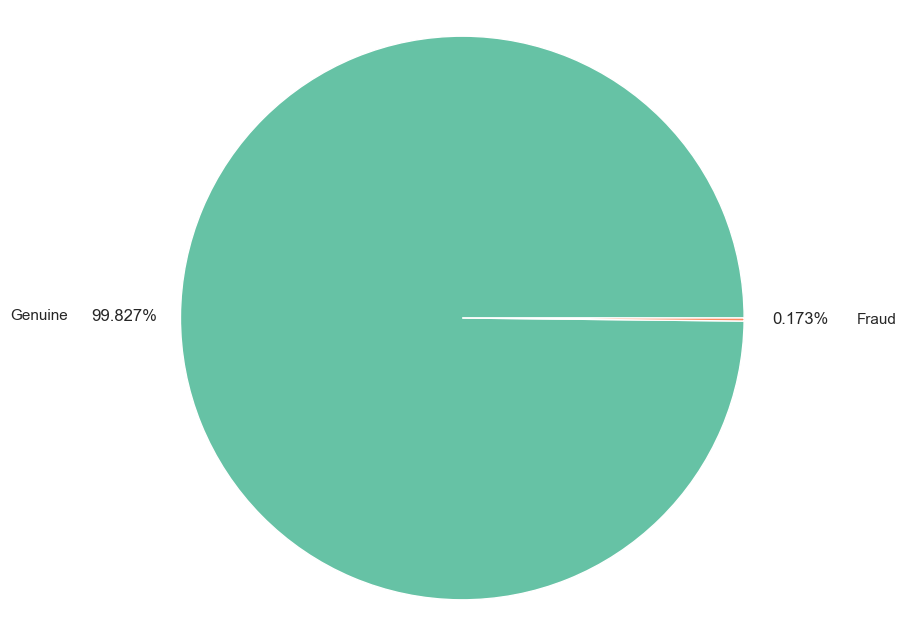

In [15]:
fraud_geneuine_list = df['Class'].value_counts().tolist()
labels = ['Genuine', 'Fraud']
sizes = [fraud_geneuine_list[0], fraud_geneuine_list[1]]

fig1, ax = plt.subplots(figsize=(8,8))
ax.pie(sizes, labels=labels, autopct='%1.3f%%', shadow=False, startangle=0, pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
plt.show()

<p>Most of machine learning algorithm not work well in the severe imbanced data set like ours. If we use orgininal dataset for our prediction, we might get the errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud</p>
<p>As we already saw that amount column has a extreme outliers so it necessary to remove them as they can effect the model's performance. We will used Interquartile range to detect outliers which removes anything below the lower limit (25 percentile) and anything above upper limit (75 Percentile).</p>
<p>Note that, the data we have for fraudulent cases is very low so we wanna keep our cutoff a bit high so as avoid removing much of the fraud cases. Here, as the data is skewed (kind of exponential) so having high cutoff will help us. Let's take the cutoff value as 5.0 instead of 1.5 which is usually used.</p>

###  Outlier detection

In [16]:
def detectOutliers(df, feature_, cutoff):
    Q3 = np.percentile(df[feature_], 75)
    Q1 = np.percentile(df[feature_], 25)
    IQR = (Q3 - Q1)
    lower_fence = Q1 - (IQR * cutoff)
    upper_fence = Q3 + (IQR * cutoff)
    
    filter_data = (df[feature_] < lower_fence) | (df[feature_] > upper_fence)
    outliers = df[filter_data][feature_]
    fraud_outliers = df[(df['Class'] == 1) & filter_data][feature_]
    genuine_outliers = df[(df['Class'] == 0) & filter_data][feature_]
    
    outliers_info = pd.DataFrame(columns=['Info','Value'])
    
    outliers_info.loc[0,'Info'] = 'Total Number of outliers '
    outliers_info.loc[0,'Value'] = outliers.count()
    
    outliers_info.loc[1,'Info'] = 'Number of outliers in Fraudulent Class '
    outliers_info.loc[1,'Value'] = fraud_outliers.count()
    
    outliers_info.loc[2,'Info'] = 'Number of outliers in Genuine Class '
    outliers_info.loc[2,'Value'] = genuine_outliers.count()
    
    outliers_info.loc[3,'Info'] = 'Percentage of Fraud amount outliers '
    outliers_info.loc[3,'Value'] = round((fraud_outliers.count()/outliers.count())*100,2)
    
    return outliers, outliers_info

In [17]:
inner_fences_outliers, inner_fences_info = detectOutliers(df,"Amount",1.5)
inner_fences_info

,Info,Value
0,Total Number of outliers,31904
1,Number of outliers in Fraudulent Class,91
2,Number of outliers in Genuine Class,31813
3,Percentage of Fraud amount outliers,0.29


In [18]:
outer_fences_outliers, outer_fences_info = detectOutliers(df,"Amount",3.0)
outer_fences_info

,Info,Value
0,Total Number of outliers,18941
1,Number of outliers in Fraudulent Class,65
2,Number of outliers in Genuine Class,18876
3,Percentage of Fraud amount outliers,0.34


In [19]:
df = df.drop(outer_fences_outliers.index)
df.reset_index(inplace=True, drop=True)

In [20]:
df.shape

(265866, 20)

<p>Since most of our featues are scaled, we should scale our features <code>Time</code> and <code>Amount</code> as well.</p>

In [21]:
std_scaler = StandardScaler()

df['scaled_amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['Time','Amount','scaled_amount','scaled_time'], axis=1, inplace=True)
df.insert(0,'scaled_amount',scaled_amount)
df.insert(1,'scaled_time',scaled_time)
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Class
0,1.774065,-1.996366,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0
1,-0.705773,-1.996366,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,0
2,1.333220,-1.996345,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,0
3,0.430095,-1.996324,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,0
4,-0.689232,-1.996324,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,-0.568671,-0.371407,1.341262,0.359894,-0.137134,0.401726,-0.058133,0.068653,-0.033194,-0.208254,0


<p>Now we will show the correlation matrix to see the pairwise correlation between each variable </p>

In [22]:
def evaluate_model(model, X_, y_):
    score_cols = ['Metric','Accuracy','Precision', 'Recall', 'F1 Score', 'AUC']
    score_df = pd.DataFrame(columns=score_cols)
    
    model_name = model.__class__.__name__
    accuracy_lst = []
    precision_lst = []
    recall_lst = []
    f1_lst = []
    auc_lst = []
    
    cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    for train_index, test_index in cv.split(X_,y_):   
        X_train, X_test = X_.iloc[train_index], X_.iloc[test_index]
        y_train, y_test = y_.iloc[train_index], y_.iloc[test_index]
        
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        accuracy_lst.append(accuracy_score(y_test,prediction))
        precision_lst.append(precision_score(y_test,prediction))
        recall_lst.append(recall_score(y_test,prediction))
        f1_lst.append(f1_score(y_test,prediction))
        auc_lst.append(roc_auc_score(y_test, prediction))

    score_df.loc[0,'Metric'] = model_name
    score_df.loc[0,'Accuracy'] = '{0:0.3f}'.format(np.mean(accuracy_lst))
    score_df.loc[0,'Precision'] = '{0:0.3f}'.format(np.mean(precision_lst))
    score_df.loc[0,'Recall'] = '{0:0.3f}'.format(np.mean(recall_lst))
    score_df.loc[0,'F1 Score'] = '{0:0.3f}'.format(np.mean(f1_lst))
    score_df.loc[0,'AUC'] = '{0:0.3f}'.format(np.mean(auc_lst))
    return score_df

In [23]:
def evaluate_model_undersampling(model, X_, y_, resampling_rate):
    score_cols = ['Metric','Accuracy','Precision', 'Recall', 'F1 Score', 'AUC']
    score_df = pd.DataFrame(columns=score_cols)
    
    model_name = model.__class__.__name__
    accuracy_lst = []
    precision_lst = []
    recall_lst = []
    f1_lst = []
    auc_lst = []
    
    cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    for train_index, test_index in cv.split(X_,y_):        
        X_train, X_test = X_.iloc[train_index], X_.iloc[test_index]
        y_train, y_test = y_.iloc[train_index], y_.iloc[test_index]
        
        X_train = X_train.values
        X_test = X_test.values
        y_train = y_train.values
        y_test = y_test.values
        
        under = RandomUnderSampler(sampling_strategy=resampling_rate)
        # X_under, y_under = under.fit_resample(X_train, y_train)
        # count = Counter(y_under)
        # print(count)
        
        steps = [('u', under),('model', model)]
        pipeline = Pipeline(steps=steps)
        pipeline.fit(X_train, y_train)
        
        prediction = model.predict(X_test)
        accuracy_lst.append(accuracy_score(y_test,prediction))
        precision_lst.append(precision_score(y_test,prediction))
        recall_lst.append(recall_score(y_test,prediction))
        f1_lst.append(f1_score(y_test,prediction))
        auc_lst.append(roc_auc_score(y_test, prediction))
    score_df.loc[0,'Metric'] = model_name + ' ' + str(resampling_rate*100) + '%'
    score_df.loc[0,'Accuracy'] = '{0:0.3f}'.format(np.mean(accuracy_lst))
    score_df.loc[0,'Precision'] = '{0:0.3f}'.format(np.mean(precision_lst))
    score_df.loc[0,'Recall'] = '{0:0.3f}'.format(np.mean(recall_lst))
    score_df.loc[0,'F1 Score'] = '{0:0.3f}'.format(np.mean(f1_lst))
    score_df.loc[0,'AUC'] = '{0:0.3f}'.format(np.mean(auc_lst))
    return score_df

In [24]:
X = df.drop('Class', axis=1)
y = df['Class']

### No Resampling

In [25]:
logreg = LogisticRegression()
logreg_noresampling = evaluate_model(logreg,X,y)

In [26]:
svm = SVC()
svm_noresampling = evaluate_model(svm,X,y)

In [27]:
xgb = XGBClassifier()
xgb_noresampling=evaluate_model(xgb,X,y)

In [28]:
no_result = pd.concat([logreg_noresampling,svm_noresampling, xgb_noresampling], axis=0)
no_result

,Metric,Accuracy,Precision,Recall,F1 Score,AUC
0,LogisticRegression,0.999,0.884,0.602,0.684,0.801
0,SVC,0.999,0.881,0.445,0.583,0.722
0,XGBClassifier,0.999,0.821,0.744,0.753,0.872


### Random undersampling

In [29]:
logreg = LogisticRegression()
logreg_under_10 = evaluate_model_undersampling(logreg,X,y,0.1)

In [30]:
logreg = LogisticRegression()
logreg_under_50 = evaluate_model_undersampling(logreg,X,y,0.5)

In [31]:
svm = SVC()
svm_under_10 =evaluate_model_undersampling(svm,X,y,0.1)

In [32]:
svm = SVC()
svm_under_50  = evaluate_model_undersampling(svm,X,y,0.5)

In [33]:
xgb = XGBClassifier()
xgb_under_10 = evaluate_model_undersampling(xgb,X,y,0.1)

In [34]:
xgb = XGBClassifier()
xgb_under_50 = evaluate_model_undersampling(xgb,X,y,0.5)

In [35]:
under_result = pd.concat([logreg_under_10,logreg_under_50,
                         svm_under_10,svm_under_50,
                         xgb_under_10,xgb_under_50], axis=0)
under_result

,Metric,Accuracy,Precision,Recall,F1 Score,AUC
0,LogisticRegression 10.0%,0.997,0.452,0.848,0.550,0.923
0,LogisticRegression 50.0%,0.986,0.131,0.902,0.219,0.944
0,SVC 10.0%,0.999,0.599,0.848,0.690,0.923
0,SVC 50.0%,0.992,0.227,0.881,0.341,0.936
0,XGBClassifier 10.0%,0.991,0.372,0.878,0.470,0.935
0,XGBClassifier 50.0%,0.967,0.088,0.902,0.154,0.934
